<a href="https://colab.research.google.com/github/aryijq/ecommerce-behavior-data-analysis/blob/main/cp2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# pip install datatable

     |████████████████████████████████| 96.9 MB 87 kB/s 


# 데이터 불러오기

### 라이브러리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import datatable as dt

event_time - 이벤트가 발생한 시간(UTC기준)\
event_type - 고객이 진행한 이벤트\
product_id - 제품의 ID\
category_id - 제품의 카테고리 ID\
categoty_code - 제품의 카테고리 분류(코드명)\
brand - 브랜드\
price - 제품의 유통가격\
user_id - 영구 사용자 ID\
user_session - 임시 사용자의 세션ID

In [2]:
# csv = '/content/drive/MyDrive/Data/2019-Oct.csv'

# # 아래 방법은 코랩 ram초과로 에러발생
# datatable_df = dt.fread(csv, encoding='utf-8')
# df = datatable_df.to_pandas()
csv = 'C:/Users/JEON_SANGEON/codestates/data/2019-Oct.csv'
origin_df = pd.read_csv(csv)

In [3]:
origin_df['event_time'] = pd.to_datetime(origin_df['event_time'], utc=True)
origin_df['event_time'] = origin_df['event_time'].dt.tz_convert('Asia/Dubai')

event_time UTC 시차 현지에 맞는 시차로 변경

In [4]:
df = origin_df.copy()
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [5]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   event_time     datetime64[ns, Asia/Dubai]
 1   event_type     object                    
 2   product_id     int64                     
 3   category_id    int64                     
 4   category_code  object                    
 5   brand          object                    
 6   price          float64                   
 7   user_id        int64                     
 8   user_session   object                    
dtypes: datetime64[ns, Asia/Dubai](1), float64(1), int64(3), object(4)
memory usage: 2.8+ GB


In [7]:
# 결측치 조회
df.isnull().sum()

# category_code    13,515,609
# brand             6,117,080
# user_session              2

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

### 결측치 처리전 데이터 분석

In [31]:
df['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [10]:
# event_type 비율 조회
df['event_type'].value_counts(normalize=True)

view        0.960673
cart        0.021827
purchase    0.017500
Name: event_type, dtype: float64

In [32]:
# 상품가격 평균분석
df['price'].describe()

count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64

In [34]:
# purchase = 742,849
# cart = 926,516
# view = 40,779,399

print(df.loc[df['event_type'] == 'purchase'].shape)
print(df.loc[df['event_type'] == 'cart'].shape)
print(df.loc[df['event_type'] == 'view'].shape)

(742849, 9)
(926516, 9)
(40779399, 9)


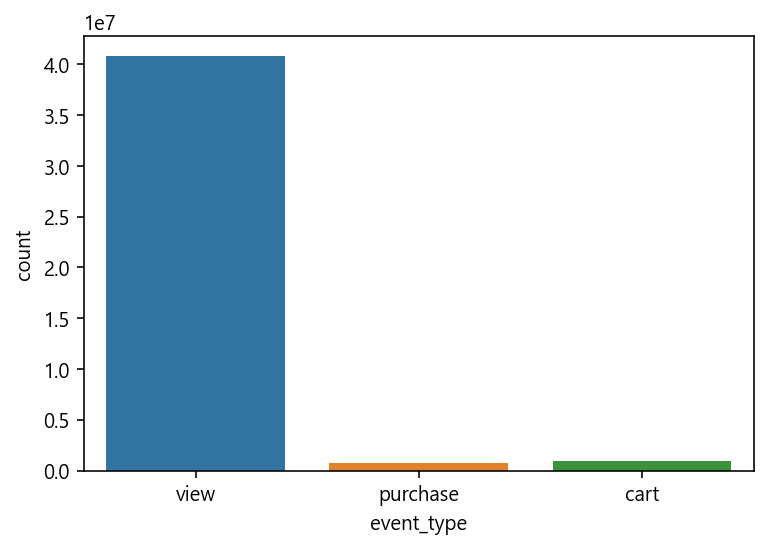

In [35]:
# event_type 비율 시각화
sns.countplot(x=df['event_type']);

## 브랜드 & 카테고리 top 10 분석

In [36]:
# 브랜드 카운트

df['brand'].value_counts().head(10)

# 5번째 위치한 lucente라는 브랜드는 카테고리가 없어 확인이 어려움

samsung    5282775
apple      4122554
xiaomi     3083763
huawei     1111205
lucente     655861
lg          562404
bosch       557090
oppo        482887
sony        456644
acer        428153
Name: brand, dtype: int64

In [37]:
# 카테고리 카운트 top 10

df['category_code'].value_counts().head(10)

electronics.smartphone              11507231
electronics.clocks                   1311033
computers.notebook                   1137623
electronics.video.tv                 1113750
electronics.audio.headphone          1100188
appliances.kitchen.refrigerators      887755
appliances.kitchen.washer             869404
appliances.environment.vacuum         801670
apparel.shoes                         763901
auto.accessories.player               470208
Name: category_code, dtype: int64

In [38]:
# 대분류 기준 top 10

df["category_code"].str.split(".").str[0].value_counts().head(10)

electronics     16135623
appliances       4967294
computers        2324217
apparel          1542924
furniture        1247160
auto             1013115
construction      730834
kids              520619
accessories       238238
sport             176616
Name: category_code, dtype: int64

In [39]:
# 중분류 기준 top 10

df["category_code"].str.split(".").str[1].value_counts().head(10)

smartphone     11507231
kitchen         3531445
audio           1574674
clocks          1311033
shoes           1208383
environment     1147634
notebook        1137623
video           1126904
accessories     1013115
tools            719816
Name: category_code, dtype: int64

In [40]:
# 소분류 기준 top 10

df["category_code"].str.split(".").str[2].value_counts().head(10)

tv               1113750
headphone        1100188
refrigerators     887755
washer            869404
vacuum            801670
player            470208
keds              410304
bed               358453
subwoofer         313664
cabinet           301410
Name: category_code, dtype: int64

view 기준

In [41]:
df_view = df.loc[df['event_type']=='view']
df_view['brand'].value_counts().head(10)

samsung    4806630
apple      3770597
xiaomi     2922650
huawei     1045572
lucente     644283
bosch       544230
lg          540131
oppo        451449
sony        439855
acer        411871
Name: brand, dtype: int64

In [42]:
df_view['category_code'].value_counts().head(10)

electronics.smartphone              10619448
electronics.clocks                   1272783
computers.notebook                   1106406
electronics.video.tv                 1055961
electronics.audio.headphone          1018542
appliances.kitchen.refrigerators      863411
appliances.kitchen.washer             831279
appliances.environment.vacuum         772029
apparel.shoes                         759646
auto.accessories.player               464272
Name: category_code, dtype: int64

purchase 기준

In [43]:
df_pur = df.loc[df['event_type']=='purchase']
df_pur['brand'].value_counts().head(10)

samsung     172896
apple       142873
xiaomi       56616
huawei       23501
lucente      11578
oppo         10891
cordiant     10551
lg            8727
acer          6882
sony          6729
Name: brand, dtype: int64

In [44]:
# 카테고리 카운트 top 10

df_pur['category_code'].value_counts().head(10)

electronics.smartphone              338018
electronics.audio.headphone          30503
electronics.video.tv                 21565
electronics.clocks                   17906
appliances.kitchen.washer            16148
computers.notebook                   15590
appliances.environment.vacuum        12378
appliances.kitchen.refrigerators     11218
electronics.tablet                    5603
auto.accessories.player               4647
Name: category_code, dtype: int64

### 브랜드 Top3 카테고리 조사

In [45]:
# 브랜드 카테고리 조사

df_samsung = df.loc[df['brand']=='samsung']
df_samsung['category_code'].value_counts().head(10)

electronics.smartphone              3778167
electronics.video.tv                 392119
appliances.kitchen.washer            263017
appliances.environment.vacuum        206226
electronics.clocks                   149106
electronics.tablet                   105580
electronics.audio.headphone           87131
appliances.kitchen.refrigerators      68951
appliances.kitchen.microwave          35610
computers.peripherals.monitor         27635
Name: category_code, dtype: int64

In [46]:
# 구매가격 평균 조회
df_samsung_pur = df_samsung.loc[df_samsung['event_type']=='purchase']
print(df_samsung_pur['category_code'].value_counts().head(10))
print(df_samsung_pur['price'].mean())

electronics.smartphone              143123
electronics.video.tv                  8970
appliances.kitchen.washer             5097
appliances.environment.vacuum         4762
electronics.clocks                    2780
electronics.tablet                    2506
electronics.audio.headphone           2223
appliances.kitchen.refrigerators       769
appliances.kitchen.microwave           746
computers.peripherals.monitor          295
Name: category_code, dtype: int64
268.41299168286133


In [47]:
df_apple = df.loc[df['brand']=='apple']
df_apple['category_code'].value_counts().head(10)

electronics.smartphone            3272845
electronics.audio.headphone        397597
electronics.clocks                 242359
computers.notebook                  87292
electronics.tablet                  76222
computers.desktop                    8922
accessories.bag                      4574
computers.peripherals.keyboard       1874
computers.peripherals.mouse           967
Name: category_code, dtype: int64

In [48]:
df_apple_pur = df_apple.loc[df_apple['event_type']=='purchase']
print(df_apple_pur['category_code'].value_counts().head(10))
print(df_apple_pur['price'].mean())

electronics.smartphone            115345
electronics.audio.headphone        17484
electronics.clocks                  7293
electronics.tablet                  1272
computers.notebook                  1110
computers.desktop                     47
computers.peripherals.mouse           11
accessories.bag                       10
computers.peripherals.keyboard         5
Name: category_code, dtype: int64
778.378481728528


In [49]:
df_xiaomi = df.loc[df['brand']=='xiaomi']
df_xiaomi['category_code'].value_counts().head(10)

electronics.smartphone            2200549
electronics.audio.headphone        214202
electronics.clocks                  91311
appliances.environment.vacuum       60227
kids.skates                         27165
computers.notebook                  23091
auto.accessories.videoregister      22537
appliances.personal.scales          11331
electronics.video.tv                 9267
accessories.bag                      9187
Name: category_code, dtype: int64

In [50]:
df_xia_pur = df_xiaomi.loc[df_xiaomi['event_type']=='purchase']
print(df_xia_pur['category_code'].value_counts().head(10))
print(df_xia_pur['price'].mean())

electronics.smartphone            38776
electronics.audio.headphone        4762
electronics.clocks                 1135
appliances.environment.vacuum       667
auto.accessories.videoregister      329
kids.skates                         244
appliances.personal.scales          236
computers.notebook                  138
accessories.bag                      83
appliances.kitchen.kettle            64
Name: category_code, dtype: int64
162.39284460223257


view, cart, purchase 시각화

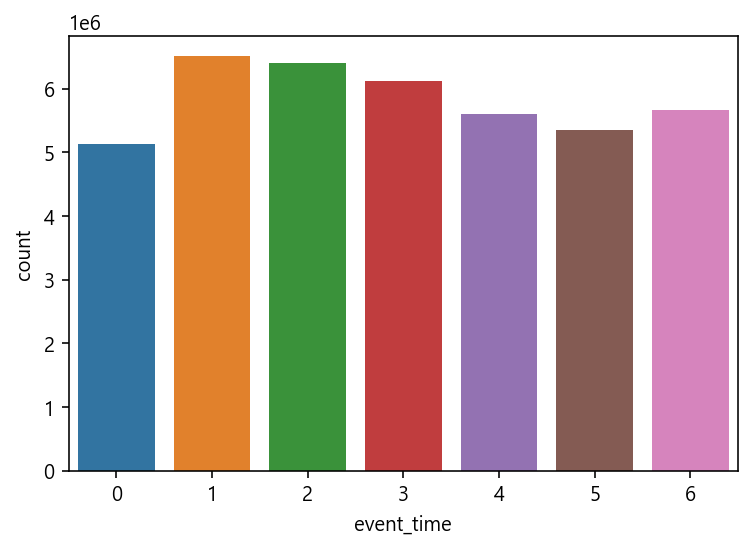

In [51]:
sns.countplot(x=df.loc[df['event_type'] == 'view']['event_time'].dt.weekday);

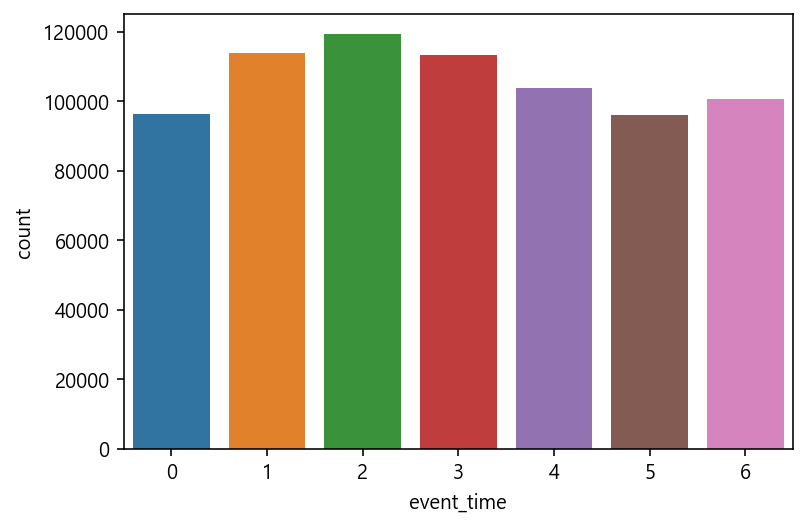

In [52]:
sns.countplot(x=df.loc[df['event_type'] == 'purchase']['event_time'].dt.weekday);

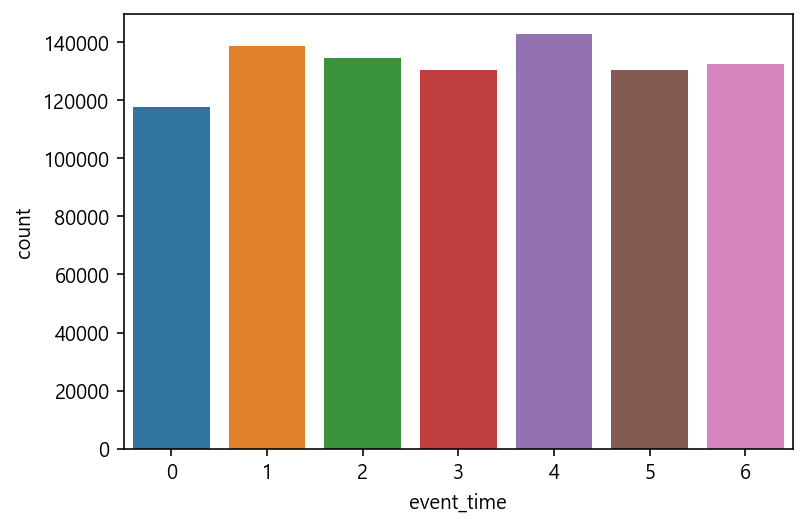

In [53]:
sns.countplot(x=df.loc[df['event_type'] == 'cart']['event_time'].dt.weekday);

weekday : 0 = 월, 1 = 화, 2 = 수, 3 = 목, 4 = 금, 5 = 토, 6 = 일

view : 1,2,3 순으로 높음\
cart : 4,1,2 순으로 높음\
purchase : 2,1,3 순으로 높음


# purchase 시간대 시각화

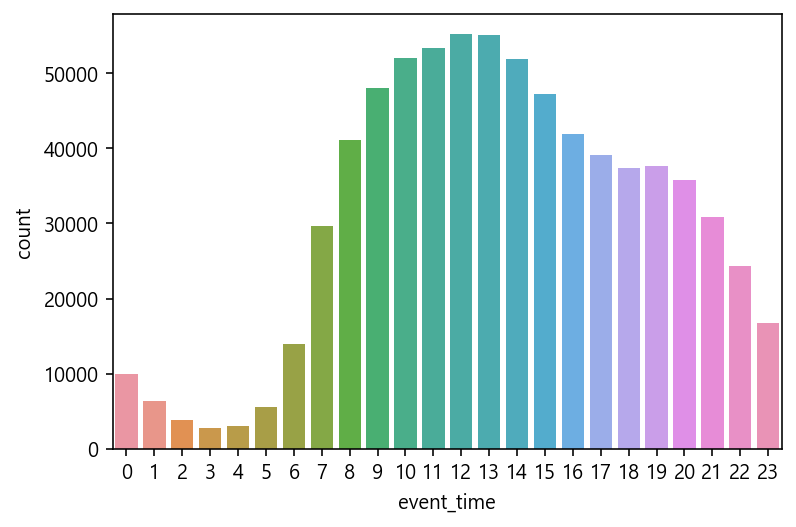

In [54]:
sns.countplot(x=df.loc[df['event_type'] == 'purchase']['event_time'].dt.hour);

purchase 구매가 많은 시간대 : 12, 13, 11 순으로 높음

### 결측치 처리

In [55]:
# 원활한 진행을 위해 category_code부터 결측 데이터를 우선적으로 확인

df_category = df[df['category_code'].isnull()]
df_category

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
6,2019-10-01 04:00:08+04:00,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 04:00:08+04:00,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
13,2019-10-01 04:00:15+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
15,2019-10-01 04:00:17+04:00,view,23100006,2053013561638126333,NaN,NaN,357.79,513642368,17566c27-0a8f-4506-9f30-c6a2ccbf583b
...,...,...,...,...,...,...,...,...,...
42448750,2019-11-01 03:59:55+04:00,view,42200036,2095518917320508073,NaN,NaN,17.50,515474976,222c370b-0fac-4287-982b-e340f5eaf3a1
42448755,2019-11-01 03:59:58+04:00,view,12800151,2053013552788144369,NaN,sony,8.49,544578298,fb46b2fb-493b-477c-8d18-ea1c24c04020
42448756,2019-11-01 03:59:58+04:00,view,5100816,2053013553375346967,NaN,xiaomi,29.58,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8


In [56]:
df_category['category_id'].value_counts().head(15)

2053013553559896355    1888744
2053013563651392361     787191
2053013556168753601     694553
2053013563693335403     491197
2053013557024391671     466987
2053013563970159485     457909
2053013563173241677     363621
2053013553853497655     352114
2053013553375346967     321525
2053013563584283495     260559
2053013553526341921     252757
2053013559733912211     194165
2053013564918072245     191423
2053013561218695907     171284
2053013552385491165     158098
Name: category_id, dtype: int64

In [57]:
df_category['product_id'].value_counts().head(10)

5100816     189460
12703015     58330
22700084     50448
22700129     49847
12703498     40143
22700068     37816
12703494     35356
4100346      33048
15100337     32384
15100009     30529
Name: product_id, dtype: int64

In [58]:
df.loc[df['category_id']==2053013553559896355]['product_id'].value_counts().head(16)

12703015    58330
12703498    40143
12703494    35356
12703415    23009
12709380    15817
12711986    15316
12718062    14249
12706259    13901
12702958    13878
12709558    13052
12711053    11834
12711949    11602
12718063    11578
12706655    11203
12703493    10844
12709953    10603
Name: product_id, dtype: int64

In [59]:
df.loc[df.product_id == 12703015]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
319,2019-10-01 04:04:54+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,555448033,95c3b60d-0e9c-45af-ab1e-64e267e0fa64
447,2019-10-01 04:07:11+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,555448033,95c3b60d-0e9c-45af-ab1e-64e267e0fa64
884,2019-10-01 04:14:42+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,512521849,62429a78-6ad0-494f-82ed-e7e9effdf726
1330,2019-10-01 06:18:01+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,530516147,87975d10-e7ff-472b-8f31-aada794f1f4c
1826,2019-10-01 06:20:13+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,512531789,a9d36d00-6067-4ff9-b756-968214bd22ff
...,...,...,...,...,...,...,...,...,...
42446918,2019-11-01 03:45:09+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,566237889,3924ad67-04ef-4dc5-a5b1-e76b1a0e6f5e
42447684,2019-11-01 03:51:42+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,529707266,3c119344-1965-48e9-8fe0-90edf88c2eb1
42447761,2019-11-01 03:52:18+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,529707266,3c119344-1965-48e9-8fe0-90edf88c2eb1
42448092,2019-11-01 03:54:50+04:00,view,12703015,2053013553559896355,NaN,cordiant,42.99,529707266,3c119344-1965-48e9-8fe0-90edf88c2eb1


In [5]:
# product_id 웹 검색을 활용하여 해당하는 카테고리를 확인함.
# 모든 데이터를 확인하기에는 시간이 오래 걸리기에 비율이 높은 30개를 우선적으로 탐색하여 진행함.

category_dict = {2053013553559896355 : 'auto.accessories.tire',
                2053013563651392361 : 'accessories.jewelry',
                2053013556168753601 : 'construction.tool.kit',
                2053013563693335403 : 'accessories.jewelry',
                2053013557024391671 : 'furniture.bedroom.set',
                2053013563970159485 : 'appliances.kitchen.cooker',
                2053013563173241677 : 'beauty.technique.dryer',
                2053013553853497655 : 'beauty.perfumery',
                2053013553375346967 : 'electronics.clock',
                2053013563584283495 : 'accessories.jewelry',
                2053013553526341921 : 'auto.accessories.disc',
                2053013559733912211 : 'furniture.living_room',
                2053013564918072245 : 'home.textiles.carpet',
                2053013561218695907 : 'electronics.video.tv',
                2053013552385491165 : 'appliances.environment.air_conditioning',
                2062461754293617058 : 'auto.accessories.car_seat',
                2053013552259662037 : 'appliances.environment.boiler',
                2053013563550729061 : 'accessories.jewelry',
                2053013558525952589 : 'electronics.smartphone.phone_accessories',
                2053013558031024687 : 'furniture.kitchen.crockery',
                2053013553484398879 : 'auto.accessories.battery',
                2053013554994348409 : 'appliances.kitchen.multibaker',
                2053013555355058573 : 'appliances.kitchen.multicooker',
                2053013557166998015 : 'furniture.bedroom.mattress',
                2085718636156158307 : 'furniture.bedroom.pillow',
                2053013558190408249 : 'furniture.kitchen.pan',
                2053013555287949705 : 'appliances.kitchen.meat_grinder',
                2144356630513320518 : 'apparel.coat',
                2053013560144954031 : 'appliances.kitchen.washer',
                2053013554524586339 : 'electronics.audio.music_center'
                }

In [6]:
# 위의 카테고리 dict를 활용하여 df에 NaN값 채우기 진행
def fill_cat(df, col="category_code"):
    # category_code 열의 None값 nones에 선언
    nones = df[col].isnull()
    for cat_id, cat_code in category_dict.items():
        # category_id 열 값 중 cat_id와 동일한 값들을 찾는 조건 설정
        cat_cond = (df["category_id"] == cat_id)
        # category_code열의 none값들 중에 cat_cond 조건과 일치하는 것을 cat_code로 선언
        df.loc[nones & cat_cond, col] = cat_code

    return df

fill_cat(df, col="category_code")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [7]:
df.isnull().sum()

# 기존 처리전 결측데이터보다 확연하게 줄어든 것을 확인할 수 있음.
# category_code    13,515,609
# brand             6,117,080

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4707919
brand            6117080
price                  0
user_id                0
user_session           2
dtype: int64

In [8]:
brand_dict = {"accessories.jewelry" : "lucente",
              "furniture.bedroom.set" : "horizon",
              "furniture.living_room.cabinet" : "stand_furniture",
              "electronics.clocks" : "q&q",
              "appliances.kitchen.refrigerators" : "biryusa"}

In [9]:
def fill_br(df, col="brand"):
    # brand 열의 None값 nones에 선언
    nones = df[col].isnull()
    for cat_code, mode in brand_dict.items():
        # category_code 열 값 중 cat_code와 동일한 값들을 찾는 조건 설정
        cat_cond = (df["category_code"] == cat_code)
        # brand열의 none값들 중에 cat_cond 조건과 일치하는 것을 mode로 선언
        df.loc[nones & cat_cond, col] = mode

    return df

In [10]:
fill_br(df, col="brand")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [57]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4707919
brand            4340951
price                  0
user_id                0
user_session           2
dtype: int64

카테고리코드(x) , 브랜드(o) = no_cat

In [11]:
# 브랜드는 있으나 카테고리 값이 없을 경우 no_category 로 임시지정

df.loc[df.category_code.isnull()&df.brand.notnull(),'category_code'] = 'no_cat'

In [11]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1521087
brand            4340951
price                  0
user_id                0
user_session           2
dtype: int64

카테고리코드 (O), 브랜드(x) = no_brand

In [12]:
# 카테고리 값은 있으나 브랜드값이 없을 경우 nobrand로 명칭하기로함.

df.loc[df.category_code.notnull()&df.brand.isnull(),'brand'] = 'no_brand'

In [22]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1521087
brand            1521087
price                  0
user_id                0
user_session           0
dtype: int64

In [62]:
df[df['user_session'].isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7157243,2019-10-06 14:26:10 UTC,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
33940774,2019-10-25 10:36:14 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [66]:
df.loc[(df['user_id']==557388939) & (df['product_id']==1801723)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7156089,2019-10-06 14:25:18 UTC,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,9c11ac2d-5c56-4994-87e4-ea077ab0ab45
7157243,2019-10-06 14:26:10 UTC,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
8123931,2019-10-07 10:15:39 UTC,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,083ceaa9-32d0-4e45-a67c-40bfaba0a275


In [13]:
df.loc[(df['user_id']==557388939)&df.user_session.isnull(),'user_session'] = '9c11ac2d-5c56-4994-87e4-ea077ab0ab45'

In [67]:
df.loc[(df['user_id']==549825742) & (df['product_id']==1004767)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
33820866,2019-10-25 09:01:50 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834071,2019-10-25 09:12:12 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834776,2019-10-25 09:12:42 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33835027,2019-10-25 09:12:52 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33840806,2019-10-25 09:17:05 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33940774,2019-10-25 10:36:14 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [14]:
df.loc[(df['user_id']==549825742)&df.user_session.isnull(),'user_session'] = 'aac8b299-4355-4c25-bbfe-c0369f19a3ce'

In [3]:
df_EDA = df.copy()

In [16]:
# df_EDA = df_EDA.fillna('missing')

In [4]:
df_EDA.isnull().sum()

Unnamed: 0       0
event_time       0
month            0
day              0
day_name         0
hour             0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [5]:
df_EDA

,Unnamed: 0,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [16]:
df_EDA['month'] = df_EDA['event_time'].dt.month
df_EDA['day'] = df_EDA['event_time'].dt.day
df_EDA['day_name'] = df_EDA['event_time'].dt.day_name()
df_EDA['hour'] = df_EDA['event_time'].dt.hour

df_EDA = df_EDA[['event_time','month','day','day_name','hour','event_type','product_id','category_id','category_code','brand','price','user_id','user_session']]

df_EDA

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [17]:
df_EDA.to_csv('cp2_EDA.csv',encoding='utf-8')

In [19]:
df_EDA_Test = df_EDA.head(100)
df_EDA_Test.to_csv('cp2_EDA_test.csv',encoding='utf-8')

# 결측치 처리 이후

In [3]:
csv_EDA = 'C:/Users/JEON_SANGEON/codestates/data/cp2_EDA.csv'
df= pd.read_csv(csv_EDA)

In [4]:
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)
df['event_time'] = df['event_time'].dt.tz_convert('Asia/Dubai')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 14 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   Unnamed: 0     int64                     
 1   event_time     datetime64[ns, Asia/Dubai]
 2   month          int64                     
 3   day            int64                     
 4   day_name       object                    
 5   hour           int64                     
 6   event_type     object                    
 7   product_id     int64                     
 8   category_id    int64                     
 9   category_code  object                    
 10  brand          object                    
 11  price          float64                   
 12  user_id        int64                     
 13  user_session   object                    
dtypes: datetime64[ns, Asia/Dubai](1), float64(1), int64(7), object(5)
memory usage: 4.4+ GB


In [7]:
df_EDA = df.copy()

In [8]:
del df_EDA['Unnamed: 0']

In [71]:
df_EDA

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


### 유저세션 활용방법 찾기

In [10]:
df_EDA.user_session.value_counts()

fb075266-182d-4c11-b5f7-4e4dcdabd4a7    1159
cfb90a35-9575-495c-b6aa-48ddca2a7a9c    1137
2183f046-46f1-4ff6-96ef-f74986e7c8a1     584
b2101293-44c1-4814-836a-94b0c03bb9c2     564
e9d2b8ad-3e69-47f2-8b8a-1fadfc583756     425
                                        ... 
a356a3ab-09dd-4ec9-81f2-9e9bc2bec238       1
b04c7e8c-4e20-4cb5-ac01-c587a11c53d2       1
a64cf5fd-e78a-4c4c-a23c-240724b7dda7       1
e268832d-4647-4a3d-a5ab-2c380a5770fb       1
6764041a-9285-4869-8a32-a79adf31d212       1
Name: user_session, Length: 9244421, dtype: int64

In [26]:
df_EDA.loc[df_EDA['user_session']=='fb075266-182d-4c11-b5f7-4e4dcdabd4a7']

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42482,2019-10-01 07:23:28+04:00,10,1,Tuesday,7,view,12712529,2053013553559896355,auto.accessories.tire,hankook,70.79,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
46549,2019-10-01 07:28:43+04:00,10,1,Tuesday,7,view,12702204,2053013553559896355,auto.accessories.tire,bridgestone,72.07,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
48970,2019-10-01 07:31:42+04:00,10,1,Tuesday,7,view,12718922,2053013553559896355,auto.accessories.tire,dunlop,72.59,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
70991,2019-10-01 07:57:20+04:00,10,1,Tuesday,7,view,12718922,2053013553559896355,auto.accessories.tire,dunlop,72.59,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
77813,2019-10-01 08:04:47+04:00,10,1,Tuesday,8,view,12711730,2053013553559896355,auto.accessories.tire,goodride,45.45,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233008,2019-10-07 16:01:53+04:00,10,7,Monday,16,view,12712529,2053013553559896355,auto.accessories.tire,hankook,64.35,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
8258881,2019-10-07 16:29:10+04:00,10,7,Monday,16,view,12717781,2053013553559896355,auto.accessories.tire,bfgoodrich,73.36,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
8275690,2019-10-07 16:47:04+04:00,10,7,Monday,16,view,12718845,2053013553559896355,auto.accessories.tire,toyo,74.39,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
8276046,2019-10-07 16:47:28+04:00,10,7,Monday,16,view,12713699,2053013553559896355,auto.accessories.tire,dunlop,69.89,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7


In [27]:
df_EDA.loc[(df_EDA['user_session']=='fb075266-182d-4c11-b5f7-4e4dcdabd4a7')&(df_EDA['event_type']=='purchase')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [28]:
df_EDA.loc[(df_EDA['user_session']=='fb075266-182d-4c11-b5f7-4e4dcdabd4a7')&(df_EDA['event_type']=='cart')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
5407821,2019-10-05 12:27:56+04:00,10,5,Saturday,12,cart,12700939,2053013553559896355,auto.accessories.tire,nokian,76.71,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7


In [32]:
df_EDA.loc[df_EDA['user_id']==513605798]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42482,2019-10-01 07:23:28+04:00,10,1,Tuesday,7,view,12712529,2053013553559896355,auto.accessories.tire,hankook,70.79,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
46549,2019-10-01 07:28:43+04:00,10,1,Tuesday,7,view,12702204,2053013553559896355,auto.accessories.tire,bridgestone,72.07,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
48970,2019-10-01 07:31:42+04:00,10,1,Tuesday,7,view,12718922,2053013553559896355,auto.accessories.tire,dunlop,72.59,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
70991,2019-10-01 07:57:20+04:00,10,1,Tuesday,7,view,12718922,2053013553559896355,auto.accessories.tire,dunlop,72.59,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
77813,2019-10-01 08:04:47+04:00,10,1,Tuesday,8,view,12711730,2053013553559896355,auto.accessories.tire,goodride,45.45,513605798,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27385398,2019-10-20 19:34:33+04:00,10,20,Sunday,19,view,12700939,2053013553559896355,auto.accessories.tire,nokian,75.25,513605798,d899b518-ff25-4920-a06d-c9032e2bb7ca
27386415,2019-10-20 19:35:07+04:00,10,20,Sunday,19,view,12711273,2053013553559896355,auto.accessories.tire,nexen,63.89,513605798,d899b518-ff25-4920-a06d-c9032e2bb7ca
27387725,2019-10-20 19:35:53+04:00,10,20,Sunday,19,view,12711730,2053013553559896355,auto.accessories.tire,goodride,48.91,513605798,d899b518-ff25-4920-a06d-c9032e2bb7ca
27388885,2019-10-20 19:36:34+04:00,10,20,Sunday,19,view,12712529,2053013553559896355,auto.accessories.tire,hankook,64.35,513605798,d899b518-ff25-4920-a06d-c9032e2bb7ca


In [33]:
df_EDA.loc[(df_EDA['user_id']==513605798)&(df_EDA['event_type']=='purchase')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [25]:
df_EDA.loc[df_EDA['user_session']=='e9d2b8ad-3e69-47f2-8b8a-1fadfc583756']

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42053204,2019-10-31 19:20:56+04:00,10,31,Thursday,19,view,1801882,2053013554415534427,electronics.video.tv,samsung,437.25,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42054095,2019-10-31 19:21:31+04:00,10,31,Thursday,19,view,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42055042,2019-10-31 19:22:08+04:00,10,31,Thursday,19,view,1801343,2053013554415534427,electronics.video.tv,toshiba,370.67,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42055594,2019-10-31 19:22:31+04:00,10,31,Thursday,19,view,1801343,2053013554415534427,electronics.video.tv,toshiba,370.67,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42056628,2019-10-31 19:23:12+04:00,10,31,Thursday,19,view,1801900,2053013554415534427,electronics.video.tv,samsung,483.41,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42395415,2019-10-31 23:53:31+04:00,10,31,Thursday,23,view,12701019,2053013553559896355,auto.accessories.tire,pirelli,687.53,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42395568,2019-10-31 23:53:48+04:00,10,31,Thursday,23,view,12701026,2053013553559896355,auto.accessories.tire,pirelli,504.52,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42396728,2019-10-31 23:55:55+04:00,10,31,Thursday,23,view,29100070,2053013565941482475,appliances.personal.massager,xiaomi,90.99,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756
42397218,2019-10-31 23:56:50+04:00,10,31,Thursday,23,view,17302996,2053013553853497655,beauty.perfumery,no_brand,875.18,566165785,e9d2b8ad-3e69-47f2-8b8a-1fadfc583756


In [34]:
df_EDA.loc[(df_EDA['user_id']==566165785)&(df_EDA['event_type']=='purchase')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [30]:
df_EDA.loc[(df_EDA['user_session']=='e9d2b8ad-3e69-47f2-8b8a-1fadfc583756')&(df_EDA['event_type']=='cart')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


## 브랜드 & 카테고리 top 10 분석

In [26]:
# 브랜드 카운트

df_EDA['brand'].value_counts().head(10)

# 5번째 위치한 lucente라는 브랜드는 카테고리가 없어 확인이 어려움

samsung    5282775
apple      4122554
xiaomi     3083763
nobrand    2819864
lucente    1541751
missing    1521087
huawei     1111205
lg          562404
bosch       557090
oppo        482887
Name: brand, dtype: int64

In [27]:
# 카테고리 카운트 top 10

df_EDA['category_code'].value_counts().head(10)

electronics.smartphone         11507231
no_cat                          3186832
auto.accessories.tire           1888744
accessories.jewelry             1676223
missing                         1521087
electronics.clocks              1311033
electronics.video.tv            1285034
computers.notebook              1137623
electronics.audio.headphone     1100188
appliances.kitchen.washer        963381
Name: category_code, dtype: int64

In [28]:
# 대분류 기준 top 10

df_EDA["category_code"].str.split(".").str[0].value_counts().head(10)

electronics     16853504
appliances       6150611
auto             3422424
no_cat           3186832
furniture        2365596
computers        2324217
accessories      1914461
apparel          1643737
missing          1521087
construction     1425387
Name: category_code, dtype: int64

In [29]:
# 중분류 기준 top 10

df_EDA["category_code"].str.split(".").str[1].value_counts().head(10)

smartphone     11640652
kitchen         4648890
accessories     3422424
jewelry         1676223
audio           1666325
environment     1447916
clocks          1311033
video           1298188
shoes           1208383
notebook        1137623
Name: category_code, dtype: int64

In [30]:
# 소분류 기준 top 10

df_EDA["category_code"].str.split(".").str[2].value_counts().head(10)

tire             1888744
tv               1285034
headphone        1100188
washer            963381
refrigerators     887755
vacuum            801670
kit               694553
player            470208
set               466987
cooker            457909
Name: category_code, dtype: int64

In [31]:
df_view_2 = df_EDA.loc[df['event_type']=='view']
df_view_2['brand'].value_counts().head(10)

samsung    4806630
apple      3770597
xiaomi     2922650
nobrand    2782373
lucente    1518812
missing    1501024
huawei     1045572
bosch       544230
lg          540131
oppo        451449
Name: brand, dtype: int64

In [32]:
df_view_2['category_code'].value_counts().head(10)

electronics.smartphone         10619448
no_cat                          3135201
auto.accessories.tire           1823852
accessories.jewelry             1651840
missing                         1501024
electronics.clocks              1272783
electronics.video.tv            1218126
computers.notebook              1106406
electronics.audio.headphone     1018542
appliances.kitchen.washer        923362
Name: category_code, dtype: int64

# 구매분석

In [33]:
df_pur_2 = df_EDA.loc[df_EDA['event_type']=='purchase']
df_pur_2['brand'].value_counts().head(10)

samsung     172896
apple       142873
xiaomi       56616
nobrand      25491
huawei       23501
lucente      22939
missing      14349
oppo         10891
cordiant     10551
lg            8727
Name: brand, dtype: int64

In [34]:
df_pur_2['category_code'].value_counts().head(10)

electronics.smartphone         338018
auto.accessories.tire           44019
electronics.audio.headphone     30503
no_cat                          28830
electronics.video.tv            25241
accessories.jewelry             24383
electronics.clocks              17906
appliances.kitchen.washer       16882
computers.notebook              15590
missing                         14349
Name: category_code, dtype: int64

In [43]:
# 상품가격 평균분석
df['price'].describe()

count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64

In [44]:
# 유저 접속 세션 횟수 조회
df['user_id'].value_counts()

512475445    7436
512365995    4013
526731152    2912
512505687    2894
513021392    2862
             ... 
556920045       1
521755468       1
515083572       1
549391147       1
544578298       1
Name: user_id, Length: 3022290, dtype: int64

In [45]:
# purchase = 742,849
# cart = 926,516
# view = 40,779,399

print(df.loc[df['event_type'] == 'purchase'].shape)
print(df.loc[df['event_type'] == 'cart'].shape)
print(df.loc[df['event_type'] == 'view'].shape)


(742849, 9)
(926516, 9)
(40779399, 9)


# 전환율 계산

In [31]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


분석보고서에 필수로 담겨야할 7가지

1. 영업이익과 영업이익률
* 2. 매출액 = 방문자수 * 전환율 * 객단가(?)
					   
* 3. 방문자 수 
	페이지뷰 수 : 평균 페이지 뷰 수 = 페이지 뷰 수/ 방문자 수
	** 세션별로 그룹바이해서 카운팅 시도해볼예정
* 4. 구매전환율(회원가입 전환율) = 구매자 수 / 방문자 수\
								purchase / view\
	 회원가입 전환율 = 회원가입자 수 / 방문자 수\
	 user_id에 None 값이 없음 회원가입 전환율을 계산할 필욘 없어보임

5. 객단가 = 매출액(?) / 주문건수 
	 
6. 고객별 세그멘테이션
	- 상품 속성 : 상품 카테고리, 기획전 상품, 브랜드별
7. 지출(판관비)

매출 = 고객수 X **객단가**

매출액 = 판매가격 * 판매량

**객단가**는 '매출 ÷ 고객수(접객수)' 로 볼수 있습니다.

In [5]:
df_view = df.loc[df['event_type']=='view']
df_purchase = df.loc[df['event_type']=='purchase']

In [6]:
# 일일 방문자수 구하기
# df_view['month'] = df_view['event_time'].dt.month
# df_view['day'] = df_view['event_time'].dt.day
# df_view['weekday'] = df_view['event_time'].dt.weekday
# df_view['hour'] = df_view['event_time'].dt.hour

# view
df_view['event_time'] = df_view['event_time'].dt.to_period('D')
df_view = df_view[['event_time','user_session']]

# purchse
df_purchase['event_time'] = df_purchase['event_time'].dt.to_period('D')
df_purchase = df_purchase[['event_time','user_session']]

df_view

,event_time,user_session
0,2019-10-01,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...
42448759,2019-11-01,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01,4c14bf2a-2820-4504-929d-046356a5a204


구매전환율 (CVR, Conversion Rate)

광고를 클릭하여 사이트에 들어온 방문자가 실제 구매 활동회원가입, 구매, 장바구니담기 등 광고주가 원하는 특정 행위을 하는 비율.

구매전환율 = 전환수(구매횟수)/클릭수*100

In [7]:
# view
df_date_view = df_view.groupby('event_time').count().reset_index()
# purchase
df_date_purchase = df_purchase.groupby('event_time').count().reset_index()

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')

# cvr 컬럼추가
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100


# 일별 매출
df_day_purchase = df.loc[df['event_type']=='purchase']
df_day_purchase['event_time'] =  df_day_purchase['event_time'].dt.to_period('D')

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# merge
df_cvr = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr['weekday'] = df_cvr['event_time'].dt.weekday
df_cvr

,event_time,user_session_x,user_session_y,CVR,price,weekday
0,2019-10-01,1161414,18726,1.612345,6067589.17,1
1,2019-10-02,1159861,19553,1.685805,6245642.44,2
2,2019-10-03,1084787,19028,1.754077,6141985.13,3
3,2019-10-04,1339366,26991,2.015207,8625039.77,4
4,2019-10-05,1263361,23436,1.855052,7325046.71,5
5,2019-10-06,1275006,22388,1.755913,6797547.07,6
6,2019-10-07,1168794,21414,1.832145,6360972.61,0
7,2019-10-08,1324643,23062,1.740997,6815780.05,1
8,2019-10-09,1304298,22696,1.740093,6825002.28,2
9,2019-10-10,1236912,21762,1.759381,6600835.12,3


In [9]:
df_cvr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   event_time      32 non-null     period[D]
 1   user_session_x  32 non-null     int64    
 2   user_session_y  32 non-null     int64    
 3   CVR             32 non-null     float64  
 4   price           32 non-null     float64  
 5   weekday         32 non-null     int64    
dtypes: float64(2), int64(3), period[D](1)
memory usage: 1.8 KB


<AxesSubplot:xlabel='event_time'>

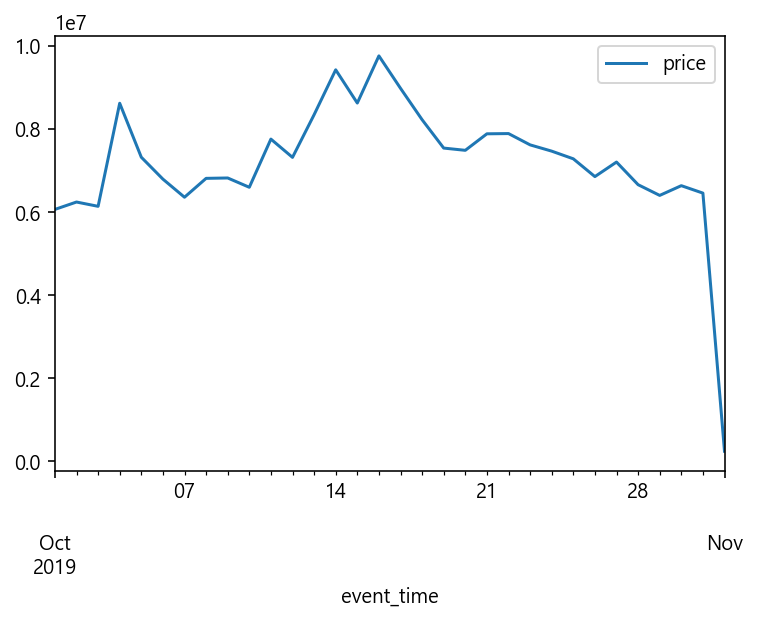

In [32]:
# 시계열 시각화

# 매출
df_cvr.plot(x='event_time', y='price')

<AxesSubplot:xlabel='event_time'>

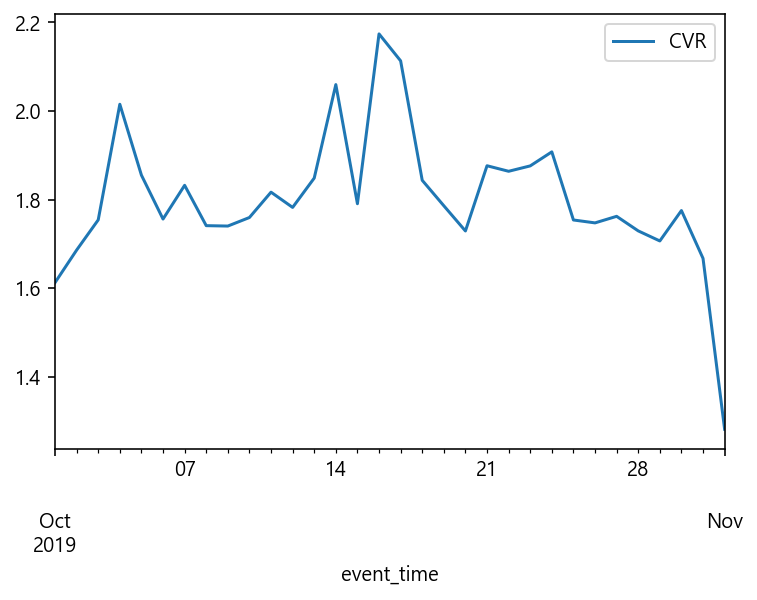

In [34]:
# CVR
df_cvr.plot(x='event_time', y='CVR')

# 요일, 시간별 히트맵 도전

In [53]:
df_pur = df.loc[df['event_type']=='purchase']
df_pur

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 04:02:14+04:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 04:04:37+04:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 04:06:02+04:00,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 04:07:07+04:00,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 04:09:26+04:00,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
42448148,2019-11-01 03:55:13+04:00,purchase,26402784,2053013563651392361,NaN,NaN,102.45,516604399,a98bd433-57ac-42d0-ba81-e18b135a7a16
42448173,2019-11-01 03:55:21+04:00,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
42448271,2019-11-01 03:56:03+04:00,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
42448362,2019-11-01 03:56:53+04:00,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [54]:
df_pur['event_time'] = df_pur['event_time'].dt.to_period('H')
df_pur = df_pur.groupby('event_time').sum().reset_index()
df_pur['day'] = df_pur['event_time'].dt.day
df_pur['hour'] = df_pur['event_time'].dt.hour
df_pur = df_pur[['event_time','day','hour','price']].reset_index(drop=True)

df_pur

,event_time,day,hour,price
0,2019-10-01 04:00,1,4,2387.84
1,2019-10-01 06:00,1,6,85533.96
2,2019-10-01 07:00,1,7,252050.18
3,2019-10-01 08:00,1,8,316664.79
4,2019-10-01 09:00,1,9,404252.06
...,...,...,...,...
738,2019-10-31 23:00,31,23,170138.77
739,2019-11-01 00:00,1,0,82827.54
740,2019-11-01 01:00,1,1,78043.44
741,2019-11-01 02:00,1,2,43966.35


In [56]:
df_pivot = df_pur.pivot_table(values='price', index='day', columns='hour')
df_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,82827.54,78043.44,43966.35,37108.56,2387.84,NaN,85533.96,252050.18,316664.79,404252.06,...,473258.18,376913.34,394692.53,354671.13,320170.93,288232.30,320258.59,247675.46,220146.94,151567.08
2,89416.87,63449.11,33872.48,21636.38,31016.98,58747.04,112034.67,227935.19,319197.26,423417.17,...,492673.17,371083.21,369725.07,321423.97,305396.37,302244.68,268879.00,280256.85,168028.30,158346.41
3,78566.96,46003.24,30547.19,21243.54,28466.29,34685.60,115456.19,270882.73,326559.86,390375.69,...,425025.68,384549.33,313432.01,318456.33,283278.73,308106.33,265771.51,255334.92,272355.68,184429.70
4,107046.56,79584.90,43736.26,37791.06,35890.34,82875.50,147835.09,317819.69,404246.32,475853.29,...,659097.70,649371.77,591273.81,610389.88,482975.30,394358.02,381647.34,348797.95,228435.41,194160.19
5,103889.63,74750.04,40967.97,47195.84,38604.39,77085.13,125147.75,284128.57,438129.95,469740.47,...,515545.27,479608.55,419566.69,372014.21,346541.97,269901.71,300283.55,288346.58,241573.31,167858.88
6,138045.46,64024.06,57291.33,23992.83,25534.81,38990.55,98471.97,202902.83,346660.47,429249.56,...,505010.04,465560.07,425426.01,334136.48,343230.06,323340.14,317124.16,277347.36,220076.85,155295.20
7,68022.78,72754.44,42674.79,40015.38,33385.27,53579.39,118561.88,233807.49,347667.53,411686.49,...,451751.89,410541.53,354722.19,331878.99,288921.08,318254.62,278121.55,267852.30,200867.95,139790.20
8,110217.97,48669.17,29866.61,21930.09,20414.09,46823.86,134287.62,287418.21,371982.31,425982.15,...,451662.37,432151.79,384337.04,360855.22,338438.39,302417.43,317210.70,280143.50,233808.83,181146.56
9,83086.43,64277.31,37980.79,29391.54,20403.14,49269.98,127867.22,280300.45,379111.29,444028.27,...,515014.92,398838.51,395459.63,366044.08,323978.31,352208.50,295614.28,253282.99,199882.32,154205.00


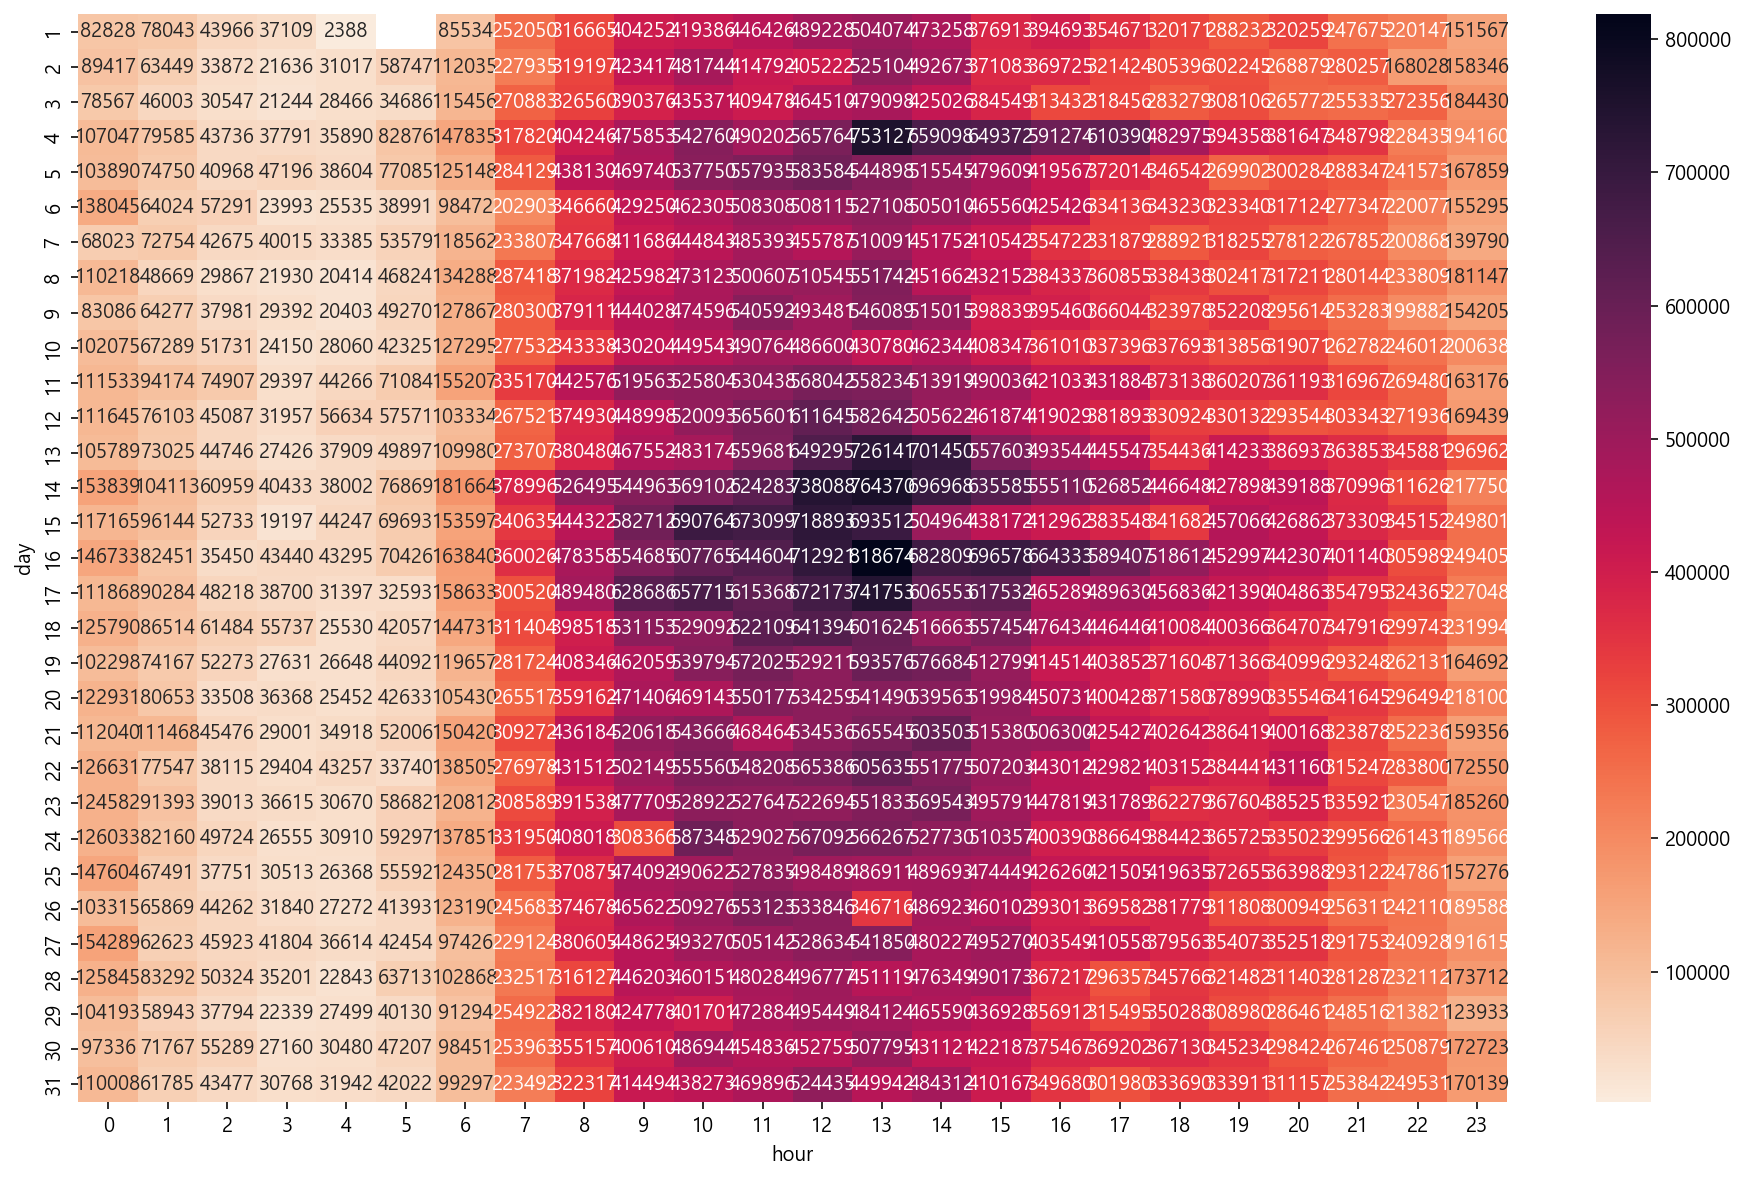

In [60]:
# 히트맵 도전
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

구매기준 일주일 사이 시간대 히트맵 구현해보기

In [84]:
df_pur = df_EDA.loc[df_EDA['event_type']=='purchase']

df_pur['event_time'] = df_pur['event_time'].dt.to_period('H')
df_pur = df_pur.groupby('event_time').sum().reset_index()
df_pur['day'] = df_pur['event_time'].dt.weekday
df_pur['hour'] = df_pur['event_time'].dt.hour
df_pur = df_pur[['event_time','day','hour','price']].reset_index(drop=True)

df_pur

,event_time,day,hour,price
0,2019-10-01 04:00,1,4,2387.84
1,2019-10-01 06:00,1,6,85533.96
2,2019-10-01 07:00,1,7,252050.18
3,2019-10-01 08:00,1,8,316664.79
4,2019-10-01 09:00,1,9,404252.06
...,...,...,...,...
738,2019-10-31 23:00,3,23,170138.77
739,2019-11-01 00:00,4,0,82827.54
740,2019-11-01 01:00,4,1,78043.44
741,2019-11-01 02:00,4,2,43966.35


In [87]:
df_pivot = df_pur.pivot_table(values='price', index='day', columns='hour')
df_pivot = df_pivot.round(0)

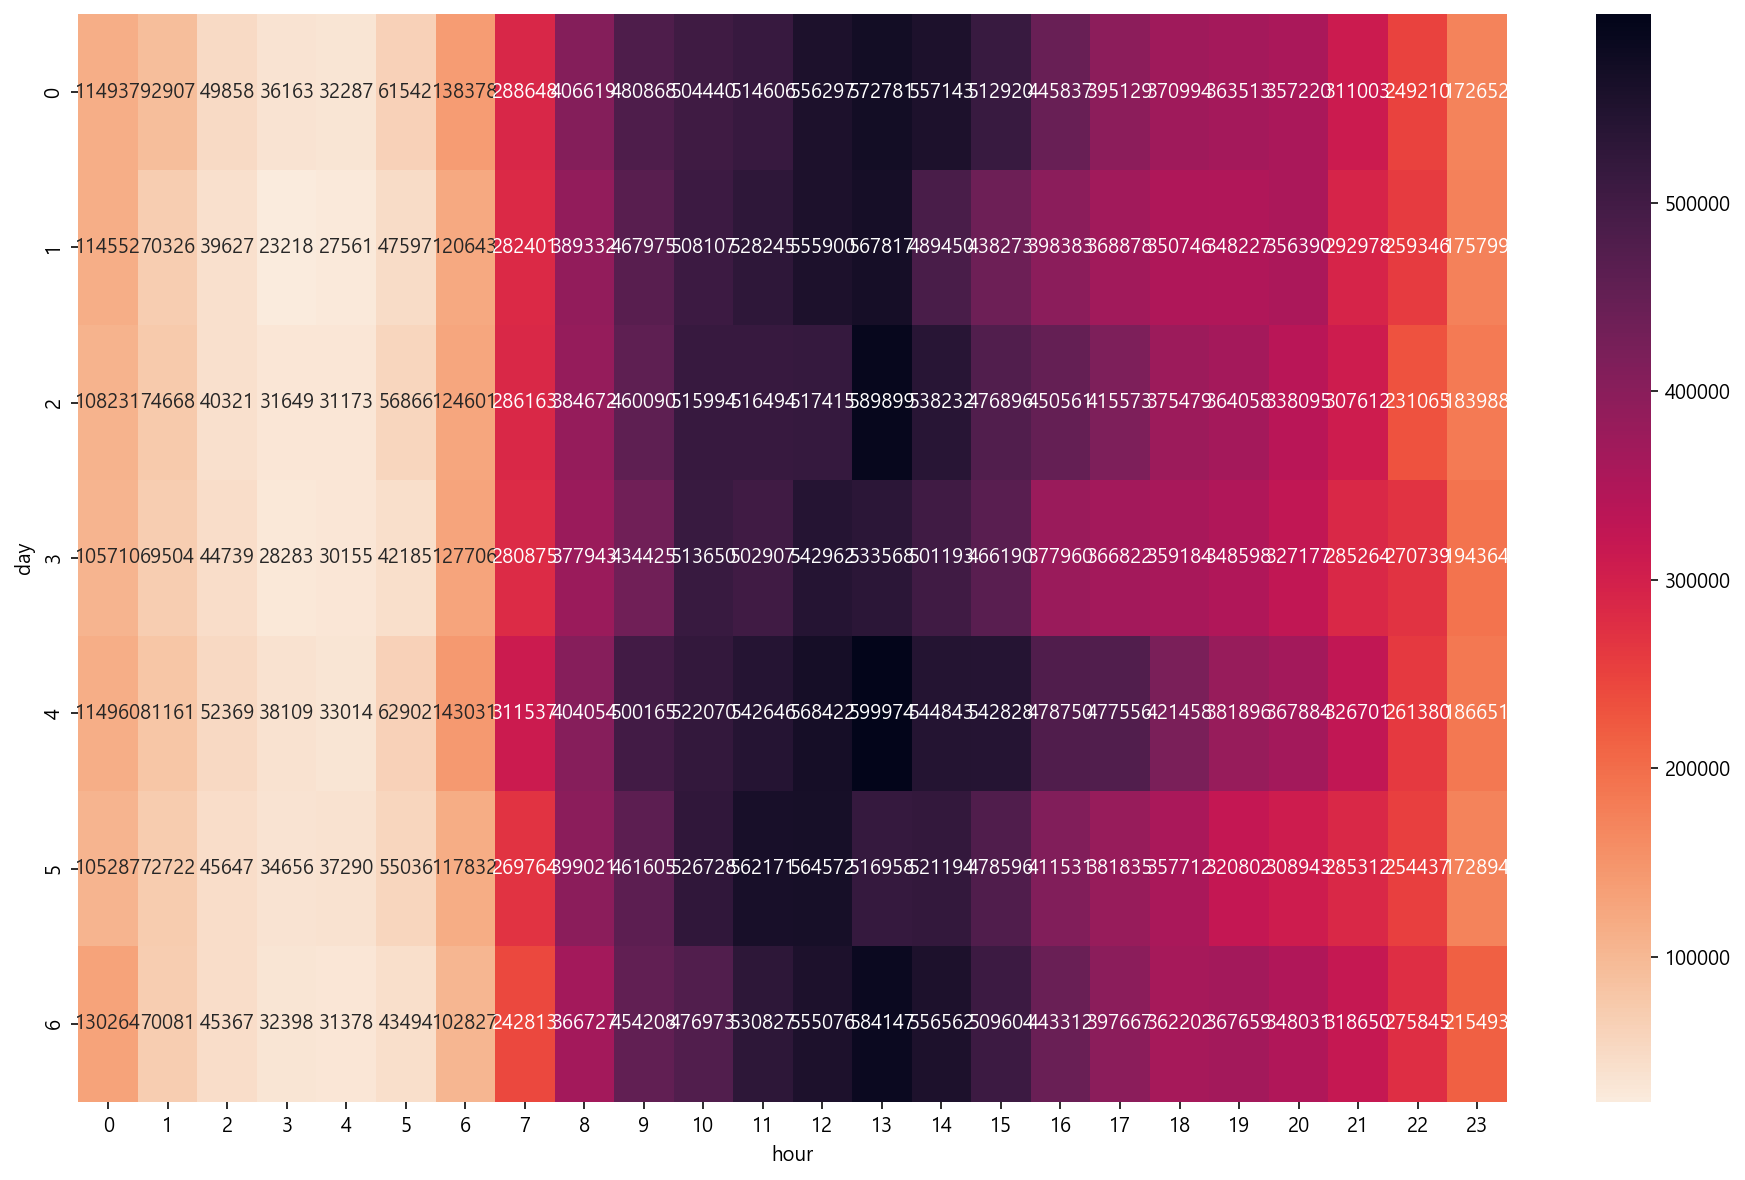

In [88]:
# 히트맵 도전
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

# 유저세션 로그데이터 활용하기

In [37]:
df_EDA

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [48]:
df_user = df_EDA[['event_time','month','day','day_name','hour','event_type','category_code','brand','user_id','user_session']]
df_user

,event_time,month,day,day_name,hour,event_type,category_code,brand,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,no_cat,shiseido,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,appliances.environment.water_heater,aqua,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,furniture.living_room.sofa,no_brand,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,computers.notebook,lenovo,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,electronics.smartphone,apple,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,electronics.camera.video,gopro,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,appliances.kitchen.multibaker,redmond,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,auto.accessories.player,kenwood,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,electronics.clocks,tissot,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [56]:
df_user_pur = df_user.loc[df_user['event_type']=='purchase']
df_user_view = df_user.loc[df_user['event_type']=='view']
df_user_cart = df_user.loc[df_user['event_type']=='cart']

In [ ]:
df_user_first = df_user.drop_duplicates('user_session', keep='first')
df_user_last = df_user.drop_duplicates('user_session', keep='last')

In [54]:
df_user_first

,event_time,month,day,day_name,hour,event_type,category_code,brand,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,no_cat,shiseido,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,appliances.environment.water_heater,aqua,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,furniture.living_room.sofa,no_brand,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,computers.notebook,lenovo,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,electronics.smartphone,apple,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448723,2019-11-01 03:59:44+04:00,11,1,Friday,3,view,missing,missing,566280860,341a87d8-8cf4-4b4a-8b7d-749380697af1
42448732,2019-11-01 03:59:50+04:00,11,1,Friday,3,view,electronics.smartphone,xiaomi,532572658,b1df0fce-6e03-47cc-b777-782b77b1b100
42448751,2019-11-01 03:59:56+04:00,11,1,Friday,3,view,electronics.smartphone,xiaomi,557202408,2169c430-9acc-4db8-8061-ac70ff0c66ea
42448755,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,no_cat,sony,544578298,fb46b2fb-493b-477c-8d18-ea1c24c04020


In [55]:
df_user_last

,event_time,month,day,day_name,hour,event_type,category_code,brand,user_id,user_session
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,appliances.environment.water_heater,aqua,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
6,2019-10-01 04:00:08+04:00,10,1,Tuesday,4,view,beauty.perfumery,creed,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
10,2019-10-01 04:00:11+04:00,10,1,Tuesday,4,view,appliances.kitchen.microwave,elenberg,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd
11,2019-10-01 04:00:11+04:00,10,1,Tuesday,4,view,electronics.smartphone,samsung,530282093,50a293fb-5940-41b2-baf3-17af0e812101
13,2019-10-01 04:00:15+04:00,10,1,Tuesday,4,view,no_cat,shiseido,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,electronics.camera.video,gopro,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,appliances.kitchen.multibaker,redmond,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,auto.accessories.player,kenwood,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,electronics.clocks,tissot,513118352,4c14bf2a-2820-4504-929d-046356a5a204


구매 2회이상 user_id 모으기

In [57]:
df_user_count = df_EDA[['event_type','user_id']]
df_user_count

,event_type,user_id
0,view,541312140
1,view,554748717
2,view,519107250
3,view,550050854
4,view,535871217
...,...,...
42448759,view,537931532
42448760,view,527322328
42448761,view,566280422
42448762,view,513118352


In [62]:
df_user_count.groupby(['user_id','event_type'],as_index=False).count()

,user_id,event_type
0,33869381,view
1,64078358,view
2,183503497,view
3,184265397,view
4,195082191,view
...,...,...
3706360,566280663,view
3706361,566280676,view
3706362,566280697,view
3706363,566280780,view


In [85]:
df_EDA

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


# 유저 행동분석

In [9]:
df_pur = df_EDA.loc[df_EDA['event_type']=='purchase']
df_cart = df_EDA.loc[df_EDA['event_type']=='cart']
df_view = df_EDA.loc[df_EDA['event_type']=='view']


In [10]:
df_pur = df_pur['user_id'].value_counts().rename_axis('user_id').reset_index(name='purchase')
df_cart = df_cart['user_id'].value_counts().rename_axis('user_id').reset_index(name='cart')
df_view = df_view['user_id'].value_counts().rename_axis('user_id').reset_index(name='view')

In [99]:
df_pur

,user_id,purchase
0,512386086,322
1,523974502,291
2,513320236,242
3,517728689,204
4,543312954,193
...,...,...
347113,549049854,1
347114,543177608,1
347115,518458614,1
347116,553746831,1


In [100]:
df_cart

,user_id,cart
0,517728689,494
1,538557901,255
2,523974502,224
3,541510103,207
4,549109608,200
...,...,...
337112,513048769,1
337113,514641884,1
337114,514979364,1
337115,518384844,1


In [101]:
df_view

,user_id,view
0,512475445,7436
1,512365995,4011
2,526731152,2911
3,512505687,2893
4,513021392,2804
...,...,...
3022125,561552090,1
3022126,555976707,1
3022127,561546912,1
3022128,561552124,1


3개 합치기

In [11]:
df_row = pd.merge(df_view,df_cart, on='user_id', how='outer')
df_row = pd.merge(df_row,df_pur, on='user_id', how='outer')
df_row

,user_id,view,cart,purchase
0,512475445,7436.0,NaN,NaN
1,512365995,4011.0,2.0,NaN
2,526731152,2911.0,1.0,NaN
3,512505687,2893.0,1.0,NaN
4,513021392,2804.0,45.0,13.0
...,...,...,...,...
3022285,556746429,NaN,NaN,1.0
3022286,513337572,NaN,NaN,1.0
3022287,559917328,NaN,NaN,1.0
3022288,559834890,NaN,NaN,1.0


In [12]:
df_row.isnull().sum()

user_id           0
view            160
cart        2685173
purchase    2675172
dtype: int64

In [13]:
df_row = df_row.fillna(0)
df_row

,user_id,view,cart,purchase
0,512475445,7436.0,0.0,0.0
1,512365995,4011.0,2.0,0.0
2,526731152,2911.0,1.0,0.0
3,512505687,2893.0,1.0,0.0
4,513021392,2804.0,45.0,13.0
...,...,...,...,...
3022285,556746429,0.0,0.0,1.0
3022286,513337572,0.0,0.0,1.0
3022287,559917328,0.0,0.0,1.0
3022288,559834890,0.0,0.0,1.0


In [118]:
df_row.view.mean()

13.492880894950517

In [119]:
df_row.cart.mean()

0.30656091903821275

In [120]:
df_row.purchase.mean()

0.24579011279526453

In [129]:
df_row.loc[df_row['purchase']>=1]

,user_id,view,cart,purchase
4,513021392,2804.0,45.0,13.0
7,546159478,2383.0,30.0,20.0
8,516308435,2312.0,0.0,4.0
9,512401084,2230.0,0.0,2.0
11,537873067,2181.0,4.0,2.0
...,...,...,...,...
3022285,556746429,0.0,0.0,1.0
3022286,513337572,0.0,0.0,1.0
3022287,559917328,0.0,0.0,1.0
3022288,559834890,0.0,0.0,1.0


In [35]:
df_row.loc[df_row['purchase']>=2]

,user_id,view,cart,purchase
4,513021392,2804.0,45.0,13.0
7,546159478,2383.0,30.0,20.0
8,516308435,2312.0,0.0,4.0
9,512401084,2230.0,0.0,2.0
11,537873067,2181.0,4.0,2.0
...,...,...,...,...
2980015,547436781,1.0,0.0,2.0
2995565,538985830,1.0,2.0,2.0
3022133,566019381,0.0,5.0,3.0
3022157,524295948,0.0,2.0,2.0


In [51]:
df_row.loc[df_row['purchase']>=4]

,user_id,view,cart,purchase
4,513021392,2804.0,45.0,13.0
7,546159478,2383.0,30.0,20.0
8,516308435,2312.0,0.0,4.0
13,532769022,2156.0,3.0,6.0
21,530599462,1807.0,31.0,31.0
...,...,...,...,...
1661906,558056641,4.0,2.0,4.0
1795065,540324457,3.0,4.0,4.0
1840946,565235141,3.0,0.0,4.0
1865316,557347845,3.0,7.0,6.0


In [138]:
df_row.loc[df_row['purchase']>=100]

,user_id,view,cart,purchase
85,545925192,1156.0,149.0,115.0
116,525351013,1047.0,143.0,129.0
230,538473314,845.0,57.0,105.0
510,538340540,671.0,47.0,126.0
618,512386086,630.0,167.0,322.0
675,517728689,611.0,494.0,204.0
760,513320236,588.0,122.0,242.0
860,547330965,563.0,35.0,131.0
863,551361102,563.0,140.0,127.0
1076,524442767,520.0,29.0,103.0


In [126]:
df_EDA.loc[df_EDA['user_id']== 545917348]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
18267058,2019-10-14 17:13:29+04:00,10,14,Monday,17,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,250.82,545917348,5063909c-abde-41f1-a83f-808e4735ca73


In [81]:
from datetime import timedelta

def time_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_df = df[user_cond]["event_time"]
    length = len(user_df)
    
    i = 1
    while i < length-1:
        
        pre_sec_diff = user_df.iloc[i] - user_df.iloc[i-1]
        post_sec_diff = user_df.iloc[i+1] - user_df.iloc[i]
        
        if post_sec_diff > pre_sec_diff:
            sec_diff = post_sec_diff
            i_idx = i
            i += 1
        else:
            sec_diff = pre_sec_diff
            i += 1

    diff_dic = {"index_interval" : f"{i_idx} ~ {i_idx+1}",
                "time difference" : sec_diff,
                "user_id" : user_id,
                f"user_session (idx {i_idx})" : df[user_cond].iloc[i_idx]["user_session"],
                f"user_session (idx {i_idx+1})" : df[user_cond].iloc[i_idx+1]["user_session"]}


    return diff_dic

In [78]:
time_diff(df_EDA, 512505687)

{'index_interval': '2890 ~ 2891',
 'time difference': Timedelta('0 days 00:00:20'),
 'user_id': 512505687,
 'user_session (idx 2890)': 'c0a4a564-2577-469d-b000-572d377e5f8b',
 'user_session (idx 2891)': 'c0a4a564-2577-469d-b000-572d377e5f8b'}

In [82]:
time_diff(df, 566165785)

{'index_interval': '423 ~ 424',
 'time difference': Timedelta('0 days 00:01:43'),
 'user_id': 566165785,
 'user_session (idx 423)': 'e9d2b8ad-3e69-47f2-8b8a-1fadfc583756',
 'user_session (idx 424)': 'e9d2b8ad-3e69-47f2-8b8a-1fadfc583756'}

In [83]:
from datetime import timedelta

def time_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_df = df[user_cond]["event_time"]
    length = len(user_df)
    
    i = 1
    while i < length-1:
        
        pre_sec_diff = user_df.iloc[i] - user_df.iloc[i-1]
        post_sec_diff = user_df.iloc[i+1] - user_df.iloc[i]
        
        if post_sec_diff > pre_sec_diff:
            sec_diff = post_sec_diff
            i_idx = i
        i += 1

    diff_dic = {"index_interval" : f"{i_idx} ~ {i_idx+1}",
                "time difference" : sec_diff,
                "user_id" : user_id,
                f"user_session (idx {i_idx})" : df[user_cond].iloc[i_idx]["user_session"],
                f"user_session (idx {i_idx+1})" : df[user_cond].iloc[i_idx+1]["user_session"]}

    return diff_dic

In [80]:
time_diff(df_EDA, 512505687)

{'index_interval': '2890 ~ 2891',
 'time difference': Timedelta('0 days 00:00:27'),
 'user_id': 512505687,
 'user_session (idx 2890)': 'c0a4a564-2577-469d-b000-572d377e5f8b',
 'user_session (idx 2891)': 'c0a4a564-2577-469d-b000-572d377e5f8b'}

In [84]:
time_diff(df, 566165785)

{'index_interval': '423 ~ 424',
 'time difference': Timedelta('0 days 00:01:43'),
 'user_id': 566165785,
 'user_session (idx 423)': 'e9d2b8ad-3e69-47f2-8b8a-1fadfc583756',
 'user_session (idx 424)': 'e9d2b8ad-3e69-47f2-8b8a-1fadfc583756'}

In [54]:

time_diff(df_pur_1, 558056641)

{'index_interval': '2 ~ 3',
 'time difference': Timedelta('0 days 00:34:56'),
 'user_id': 558056641,
 'user_session (idx 2)': 'eab52899-ebd4-44d0-ada6-fb62d1380306',
 'user_session (idx 3)': 'eab52899-ebd4-44d0-ada6-fb62d1380306'}

4회 이상인 값들만 나옴

In [40]:
from datetime import timedelta

def sess_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_sess = df[user_cond]["user_session"]
    user_time = df[user_cond]["event_time"]
    user_event = df[user_cond]["event_type"]
    length = len(user_sess)

    diff_sess = {}
    date_time = []
    time_diff = []
    sess_idx = []
    sess_data = []
    event_data = []

    date_time.append(user_time.iloc[0])
    time_diff.append(timedelta(seconds=0))
    sess_idx.append(0)
    sess_data.append(user_sess.iloc[0])
    event_data.append(user_event.iloc[0])

    i = 1
    while i < length-1:

        if user_sess.iloc[i] != user_sess.iloc[i+1]:
            date_time.append(user_time.iloc[i+1])
            time_diff.append(user_time.iloc[i+1] - user_time.iloc[i])
            sess_idx.append(i+1)
            sess_data.append(user_sess.iloc[i+1])
            event_data.append(user_event.iloc[i+1])

        i+=1

    diff_sess["event_time"] = date_time
    diff_sess["event_type"] = event_data
    diff_sess["time_diff"] = time_diff
    diff_sess["sess_idx"] = sess_idx
    diff_sess["sess_data"] = sess_data
    
    sess_diff_df = pd.DataFrame(diff_sess)
    
    return sess_diff_df

In [52]:
sess_diff(df_EDA, 558056641)

,event_time,event_type,time_diff,sess_idx,sess_data
0,2019-10-08 16:14:05+04:00,view,0 days,0,eab52899-ebd4-44d0-ada6-fb62d1380306


In [53]:
sess_diff(df_pur_1, 558056641)

,event_time,event_type,time_diff,sess_idx,sess_data
0,2019-10-08 16:27:47+04:00,purchase,0 days,0,eab52899-ebd4-44d0-ada6-fb62d1380306


### 재구매까지 오래걸린시간

In [31]:
df_row.loc[df_row['purchase']==4]

,user_id,view,cart,purchase
8,516308435,2312.0,0.0,4.0
25,513255323,1611.0,3.0,4.0
42,523047611,1425.0,4.0,4.0
58,529839452,1272.0,1.0,4.0
69,512483288,1234.0,2.0,4.0
...,...,...,...,...
1658468,564365961,4.0,4.0,4.0
1661906,558056641,4.0,2.0,4.0
1795065,540324457,3.0,4.0,4.0
1840946,565235141,3.0,0.0,4.0


In [21]:
df_pur_1 = df_EDA.loc[df_EDA['event_type']=='purchase']

In [143]:
df_pur

,user_id,purchase
0,512386086,322
1,523974502,291
2,513320236,242
3,517728689,204
4,543312954,193
...,...,...
347113,549049854,1
347114,543177608,1
347115,518458614,1
347116,553746831,1


In [24]:
from datetime import timedelta

def time_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_df = df[user_cond]["event_time"]
    length = len(user_df)
    
    i = 1
    bigger = {}
    while i < length-1:
        
        pre_sec_diff = user_df.iloc[i] - user_df.iloc[i-1]
        post_sec_diff = user_df.iloc[i+1] - user_df.iloc[i]
        
        if post_sec_diff > pre_sec_diff:
            bigger[i] = post_sec_diff
            
        i += 1
    
    bigger_keys = list(bigger.keys())
    bigger_values = list(bigger.values())
    max_value = max(bigger.values())
    position = bigger_values.index(max_value)
    idx = bigger_keys[position]

    diff_dic = {"index_interval" : f"{idx} ~ {idx+1}",
                "time difference" : max_value,
                "user_id" : user_id,
                f"user_session (idx {idx})" : df[user_cond].iloc[idx]["user_session"],
                f"user_session (idx {idx+1})" : df[user_cond].iloc[idx+1]["user_session"]}

    return diff_dic

In [34]:
time_diff(df_pur_1, 543312954)

{'index_interval': '187 ~ 188',
 'time difference': Timedelta('2 days 17:51:09'),
 'user_id': 543312954,
 'user_session (idx 187)': '9ae788b8-4121-4b22-b2b1-16fe2d4c8613',
 'user_session (idx 188)': 'a782ab8a-98ba-42c2-870f-c662269ef616'}

In [33]:
time_diff(df_pur_1, 523974502)

{'index_interval': '284 ~ 285',
 'time difference': Timedelta('6 days 18:09:35'),
 'user_id': 523974502,
 'user_session (idx 284)': 'c4c0b7c0-1af9-4a8e-80b2-73861395b0de',
 'user_session (idx 285)': '88ca1b64-5cae-47ac-9fe7-015715da8488'}

# 코호트분석 도전

In [139]:
df_EDA

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,11,1,Friday,3,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,11,1,Friday,3,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [140]:
df_EDA.loc[(df_EDA['day']==2)&(df_EDA['event_type']=='purchase')]

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1196396,2019-10-02 00:00:02+04:00,10,2,Wednesday,0,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,253.16,534562370,65ec5f9b-4e28-48f7-8946-01d976bdf64b
1196608,2019-10-02 00:00:27+04:00,10,2,Wednesday,0,purchase,1005116,2053013555631882655,electronics.smartphone,apple,1052.79,552060163,c25914b7-71f6-4239-b70b-e9040a806aaa
1196821,2019-10-02 00:00:51+04:00,10,2,Wednesday,0,purchase,5900030,2053013560841208525,no_cat,garmin,193.01,512814029,8556b72d-f0c0-4225-a46c-1adba30987b2
1196839,2019-10-02 00:00:53+04:00,10,2,Wednesday,0,purchase,12703015,2053013553559896355,auto.accessories.tire,cordiant,42.99,543346126,a4cc5e0d-4517-4eab-bea6-46a0d844af36
1196927,2019-10-02 00:01:03+04:00,10,2,Wednesday,0,purchase,26202988,2053013563693335403,accessories.jewelry,lucente,417.66,515464820,8fa24882-d48f-4efc-9e31-e9e6932f591e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392593,2019-10-02 23:58:57+04:00,10,2,Wednesday,23,purchase,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,512534999,8700cd7b-12d0-44c9-8338-bb9775ba800e
2392771,2019-10-02 23:59:24+04:00,10,2,Wednesday,23,purchase,3100204,2053013555262783879,appliances.kitchen.blender,philips,51.46,523438504,b8c37a72-b67e-4aee-b209-b25f891370d4
2392831,2019-10-02 23:59:33+04:00,10,2,Wednesday,23,purchase,12716676,2053013553559896355,auto.accessories.tire,powertrac,53.93,514575272,c5343edd-8829-46b4-90c4-5e9cdda5873e
2392996,2019-10-02 23:59:58+04:00,10,2,Wednesday,23,purchase,3200173,2053013555321504139,appliances.kitchen.meat_grinder,no_brand,55.32,551203042,fc01313f-11c0-4d2a-b0f1-481c61f4a3c0


In [77]:
df_co = df_pur_1[['event_time','product_id','user_id']].reset_index(drop=True)

df_co

,event_time,product_id,user_id
0,2019-10-01 04:02:14+04:00,1004856,543272936
1,2019-10-01 04:04:37+04:00,1002532,551377651
2,2019-10-01 04:06:02+04:00,5100816,514591159
3,2019-10-01 04:07:07+04:00,13800054,555332717
4,2019-10-01 04:09:26+04:00,4804055,524601178
...,...,...,...
742844,2019-11-01 03:55:13+04:00,26402784,516604399
742845,2019-11-01 03:55:21+04:00,47500017,514622109
742846,2019-11-01 03:56:03+04:00,1003306,512717356
742847,2019-11-01 03:56:53+04:00,1004240,533892594


In [78]:
df_co['event_time'] = df_co['event_time'].dt.strftime("%Y-%m-%d")

In [81]:
df_co['OrderPeriod'] = df_co['event_time']
df_co

,event_time,product_id,user_id,OrderPeriod
0,2019-10-01,1004856,543272936,2019-10-01
1,2019-10-01,1002532,551377651,2019-10-01
2,2019-10-01,5100816,514591159,2019-10-01
3,2019-10-01,13800054,555332717,2019-10-01
4,2019-10-01,4804055,524601178,2019-10-01
...,...,...,...,...
742844,2019-11-01,26402784,516604399,2019-11-01
742845,2019-11-01,47500017,514622109,2019-11-01
742846,2019-11-01,1003306,512717356,2019-11-01
742847,2019-11-01,1004240,533892594,2019-11-01


In [82]:
df_co.set_index('user_id',inplace=True)
df_co

,event_time,product_id,OrderPeriod
user_id,,,
543272936,2019-10-01,1004856,2019-10-01
551377651,2019-10-01,1002532,2019-10-01
514591159,2019-10-01,5100816,2019-10-01
555332717,2019-10-01,13800054,2019-10-01
524601178,2019-10-01,4804055,2019-10-01
...,...,...,...
516604399,2019-11-01,26402784,2019-11-01
514622109,2019-11-01,47500017,2019-11-01
512717356,2019-11-01,1003306,2019-11-01


In [83]:
# user_id별 첫 주문일자

FirstOrder=df_co.groupby(df_co.index)['event_time'].min()
FirstOrder.head()

user_id
264649825    2019-10-06
303160429    2019-10-13
340041246    2019-10-03
371877401    2019-10-09
384989212    2019-10-18
Name: event_time, dtype: object

In [84]:
df_co['FirstOrder']=FirstOrder
df_co.reset_index(inplace=True)
df_co.head()

,user_id,event_time,product_id,OrderPeriod,FirstOrder
0,543272936,2019-10-01,1004856,2019-10-01,2019-10-01
1,551377651,2019-10-01,1002532,2019-10-01,2019-10-01
2,514591159,2019-10-01,5100816,2019-10-01,2019-10-01
3,555332717,2019-10-01,13800054,2019-10-01,2019-10-01
4,524601178,2019-10-01,4804055,2019-10-01,2019-10-01


In [85]:
grouped = df_co.groupby(['FirstOrder', 'OrderPeriod'])

In [86]:
cohorts=grouped['user_id'].nunique()
cohorts.head()

FirstOrder  OrderPeriod
2019-10-01  2019-10-01     13704
            2019-10-02      1520
            2019-10-03      1217
            2019-10-04      1315
            2019-10-05      1036
Name: user_id, dtype: int64

In [87]:
cohorts=cohorts.reset_index()
cohorts

,FirstOrder,OrderPeriod,user_id
0,2019-10-01,2019-10-01,13704
1,2019-10-01,2019-10-02,1520
2,2019-10-01,2019-10-03,1217
3,2019-10-01,2019-10-04,1315
4,2019-10-01,2019-10-05,1036
...,...,...,...
523,2019-10-30,2019-10-31,492
524,2019-10-30,2019-11-01,14
525,2019-10-31,2019-10-31,7877
526,2019-10-31,2019-11-01,15


In [88]:
cohorts.rename({'UserId':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

,FirstOrder,OrderPeriod,user_id
0,2019-10-01,2019-10-01,13704
1,2019-10-01,2019-10-02,1520
2,2019-10-01,2019-10-03,1217
3,2019-10-01,2019-10-04,1315
4,2019-10-01,2019-10-05,1036


In [89]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2019-10-01    32
2019-10-02    31
2019-10-03    30
2019-10-04    29
2019-10-05    28
2019-10-06    27
2019-10-07    26
2019-10-08    25
2019-10-09    24
2019-10-10    23
2019-10-11    22
2019-10-12    21
2019-10-13    20
2019-10-14    19
2019-10-15    18
2019-10-16    17
2019-10-17    16
2019-10-18    15
2019-10-19    14
2019-10-20    13
2019-10-21    12
2019-10-22    11
2019-10-23    10
2019-10-24     9
2019-10-25     8
2019-10-26     7
2019-10-27     6
2019-10-28     5
2019-10-29     4
2019-10-30     3
2019-10-31     2
2019-11-01     1
Name: FirstOrder, dtype: int64

In [92]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [93]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,FirstOrder,OrderPeriod,user_id,CohortPeriod
0,2019-10-01,2019-10-01,13704,0
1,2019-10-01,2019-10-02,1520,1
2,2019-10-01,2019-10-03,1217,2
3,2019-10-01,2019-10-04,1315,3
4,2019-10-01,2019-10-05,1036,4
5,2019-10-01,2019-10-06,937,5
6,2019-10-01,2019-10-07,941,6
7,2019-10-01,2019-10-08,921,7
8,2019-10-01,2019-10-09,857,8
9,2019-10-01,2019-10-10,828,9


In [94]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts.head()

OrderPeriod  user_id
FirstOrder CohortPeriod                     
2019-10-01 0             2019-10-01    13704
           1             2019-10-02     1520
           2             2019-10-03     1217
           3             2019-10-04     1315
           4             2019-10-05     1036

In [96]:
cohorts=cohorts['user_id'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2019-10-01,13704.0,1520.0,1217.0,1315.0,1036.0,937.0,941.0,921.0,857.0,828.0,...,618.0,620.0,613.0,510.0,503.0,528.0,482.0,484.0,520.0,22.0
2019-10-02,12403.0,1096.0,1061.0,787.0,689.0,687.0,654.0,654.0,610.0,665.0,...,392.0,394.0,367.0,395.0,349.0,388.0,363.0,340.0,18.0,NaN
2019-10-03,11280.0,1096.0,676.0,610.0,573.0,566.0,549.0,541.0,530.0,465.0,...,361.0,308.0,315.0,300.0,280.0,293.0,312.0,18.0,NaN,NaN
2019-10-04,15682.0,1203.0,788.0,742.0,734.0,599.0,580.0,662.0,622.0,612.0,...,387.0,383.0,347.0,318.0,348.0,304.0,18.0,NaN,NaN,NaN
2019-10-05,13044.0,893.0,545.0,544.0,507.0,414.0,508.0,433.0,505.0,492.0,...,285.0,241.0,253.0,257.0,218.0,10.0,NaN,NaN,NaN,NaN
2019-10-06,12281.0,749.0,521.0,436.0,418.0,425.0,398.0,484.0,432.0,415.0,...,233.0,222.0,188.0,201.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,11134.0,809.0,551.0,452.0,439.0,398.0,385.0,437.0,416.0,387.0,...,199.0,188.0,213.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,11841.0,847.0,526.0,509.0,435.0,463.0,468.0,415.0,474.0,383.0,...,224.0,230.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11371.0,744.0,574.0,456.0,451.0,458.0,387.0,415.0,347.0,316.0,...,212.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
cohorts[0]

FirstOrder
2019-10-01    13704.0
2019-10-02    12403.0
2019-10-03    11280.0
2019-10-04    15682.0
2019-10-05    13044.0
2019-10-06    12281.0
2019-10-07    11134.0
2019-10-08    11841.0
2019-10-09    11371.0
2019-10-10    10718.0
2019-10-11    12819.0
2019-10-12    12631.0
2019-10-13    14703.0
2019-10-14    11956.0
2019-10-15    11148.0
2019-10-16    13851.0
2019-10-17    11560.0
2019-10-18    10824.0
2019-10-19    10650.0
2019-10-20    11078.0
2019-10-21    10607.0
2019-10-22    10586.0
2019-10-23    10173.0
2019-10-24     9757.0
2019-10-25     9628.0
2019-10-26     9409.0
2019-10-27     9703.0
2019-10-28     8314.0
2019-10-29     8008.0
2019-10-30     8174.0
2019-10-31     7877.0
2019-11-01      204.0
Name: 0, dtype: float64

In [98]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,0.110917,0.088806,0.095957,0.075598,0.068374,0.068666,0.067207,0.062536,0.060420,...,0.045096,0.045242,0.044731,0.037215,0.036705,0.038529,0.035172,0.035318,0.037945,0.001605
2019-10-02,1.0,0.088366,0.085544,0.063452,0.055551,0.055390,0.052729,0.052729,0.049182,0.053616,...,0.031605,0.031767,0.029590,0.031847,0.028138,0.031283,0.029267,0.027413,0.001451,NaN
2019-10-03,1.0,0.097163,0.059929,0.054078,0.050798,0.050177,0.048670,0.047961,0.046986,0.041223,...,0.032004,0.027305,0.027926,0.026596,0.024823,0.025975,0.027660,0.001596,NaN,NaN
2019-10-04,1.0,0.076712,0.050249,0.047315,0.046805,0.038197,0.036985,0.042214,0.039663,0.039026,...,0.024678,0.024423,0.022127,0.020278,0.022191,0.019385,0.001148,NaN,NaN,NaN
2019-10-05,1.0,0.068461,0.041782,0.041705,0.038868,0.031739,0.038945,0.033195,0.038715,0.037718,...,0.021849,0.018476,0.019396,0.019703,0.016713,0.000767,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.060989,0.042423,0.035502,0.034036,0.034606,0.032408,0.039410,0.035176,0.033792,...,0.018972,0.018077,0.015308,0.016367,0.000896,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.072660,0.049488,0.040596,0.039429,0.035746,0.034579,0.039249,0.037363,0.034758,...,0.017873,0.016885,0.019131,0.000449,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.071531,0.044422,0.042986,0.036737,0.039101,0.039524,0.035048,0.040030,0.032345,...,0.018917,0.019424,0.000591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.065430,0.050479,0.040102,0.039662,0.040278,0.034034,0.036496,0.030516,0.027790,...,0.018644,0.000879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


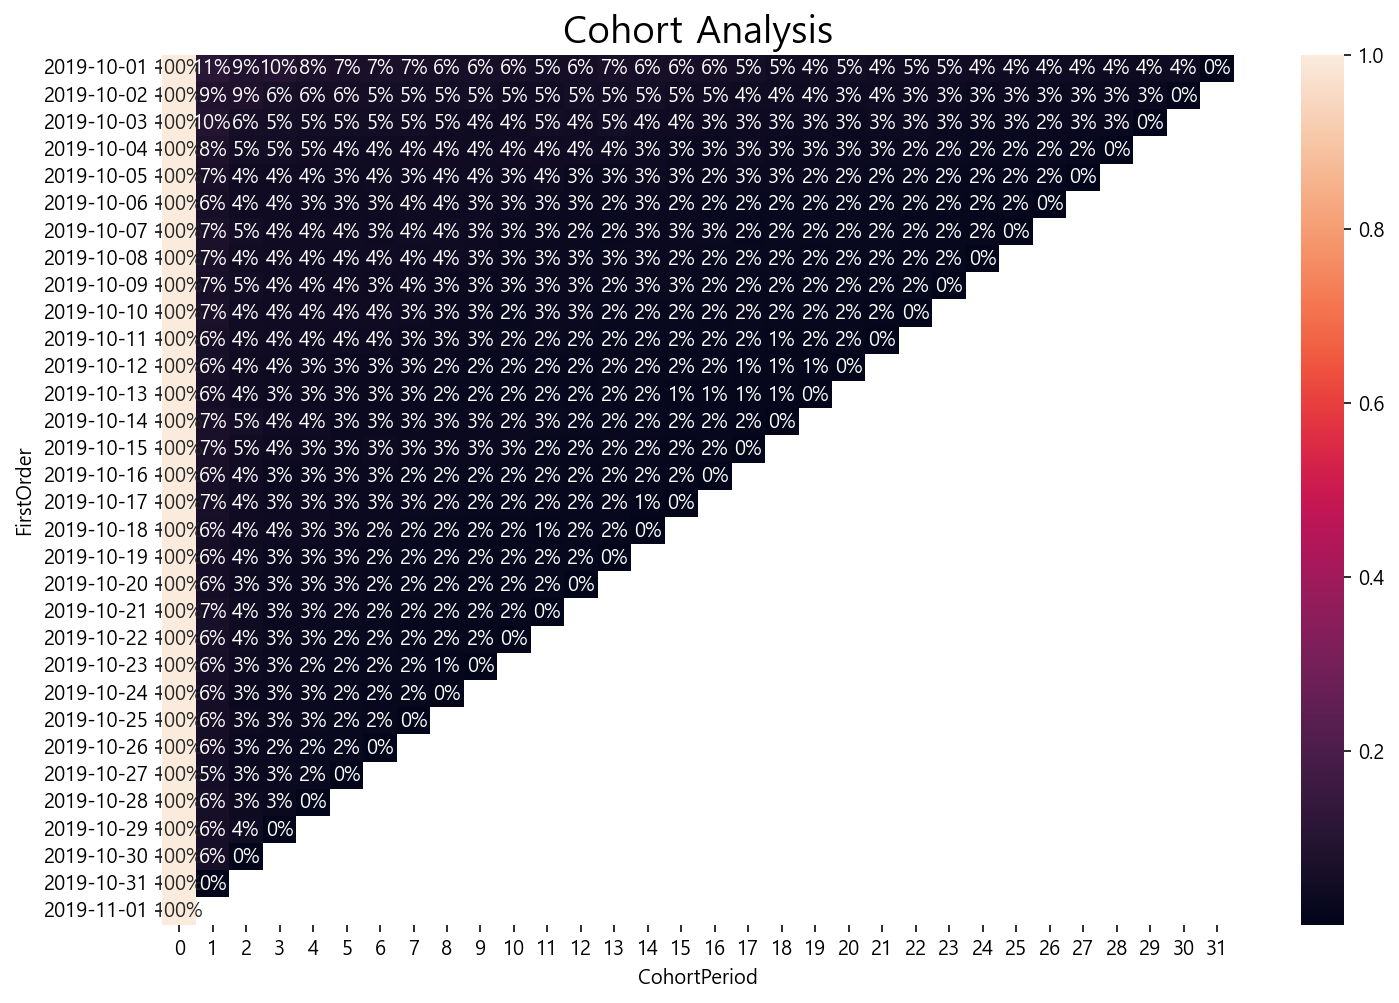

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()